# **Linear Regression using Sklearn**


This note book cover the following concepts

1. Visualization
2. Sea born

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

### **TRAINING DATA PRE-PROCESSING**
The first step in the machine learning pipeline is to clean and transform the training data into a useable format for analysis and modeling.   

As such, data pre-processing addresses:
- Assumptions about data shape
- Incorrect data types
- Outliers or errors
- Missing values
- Categorical variables

In [ ]:
full_data = pd.read_csv('/content/USA_Housing.csv')

**Data Shape**  
After loading the dataset, I examine its shape to get a better sense of the data and the information it contains.  

In [ ]:
# Data shape
print('train data:',full_data.shape)

train data: (5000, 7)


In [ ]:
# View first few rows
full_data.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
# Data Info
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Missing Data**  
 A heatmap will help better visualize what features as missing the most information.

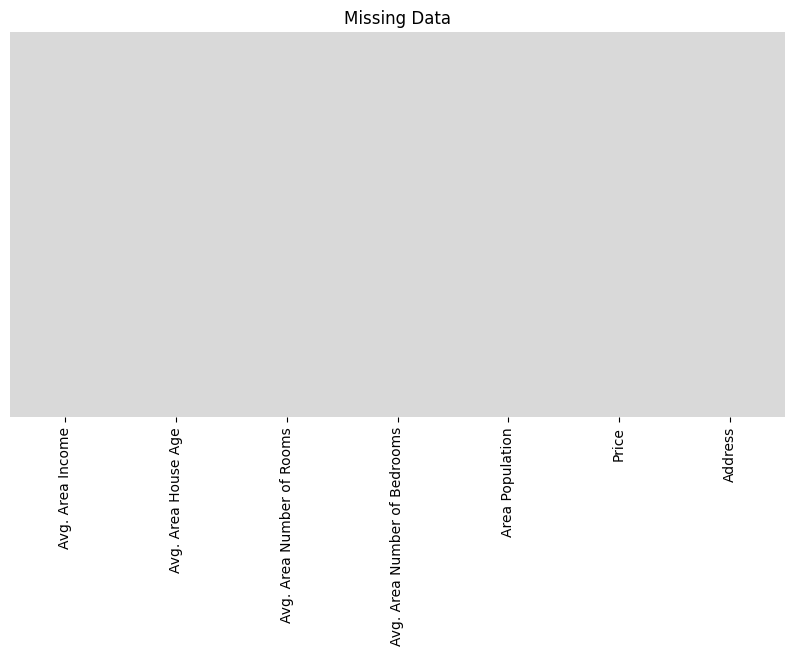

In [ ]:
# Heatmap
sns.heatmap(full_data.isnull(),yticklabels=False,cbar=False,cmap='tab20c_r')
plt.title('Missing Data')
plt.show()

In [ ]:
# Remove address feature
full_data.drop('Address',axis=1,inplace=True)

In [ ]:
# Remove row with missing data
full_data.dropna(inplace=True)

In [ ]:
full_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [ ]:
# Numeric summary
full_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### **GETTING MODEL READY**

Now that we've explored the data, it is time to get these features 'model ready'. Categorial features will need to be converted into 'dummy variables', otherwise a machine learning algorithm will not be able to take in those features as inputs.

In [ ]:
# Shape of train data
full_data.shape

(5000, 6)


>Now the train data is perfect for a machine learning algorithm:  
- all the data is numeric
- everything is concatenated together

## **OBJECTIVE 2: MACHINE LEARNING**
Next, I will feed these features into various classification algorithms to determine the best performance using a simple framework: **Split, Fit, Predict, Score It.**

## **Target Variable Splitting**
We will spilt the Full dataset into **Input** and **target** variables

Input is also called **Feature Variables**
Output referes to Target **variables**

In [ ]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Price', axis = 1) # grabs everything else but 'Price'

# Create target variable
y = full_data['Price'] # y is the column we're trying to predict


In [ ]:
x # x Represents the Features
x.shape

(5000, 5)

In [ ]:
y # y represents the Target
y.shape

(5000,)

In [ ]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [ ]:
x_train.shape
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3413,69048.788093,6.619712,6.123813,4.33,36817.368760
1610,67866.899929,5.393978,9.359022,5.44,43122.574176
3459,56636.238191,5.497667,7.121872,6.10,47541.431763
4293,79310.361977,4.247434,7.518204,4.38,43982.188957
1039,72821.247664,6.480819,7.116655,5.33,40594.059297
...,...,...,...,...,...
4171,56610.642563,4.846832,7.558137,3.29,25494.740298
599,70596.850945,6.548274,6.539986,3.10,51614.830136
1361,55621.899104,3.735942,6.868291,2.30,63184.613147
1547,63044.460096,5.935261,5.913454,4.10,32725.279544


In [ ]:
# y_train.shape
y_train

,Price
3413,1.305210e+06
1610,1.400961e+06
3459,1.048640e+06
4293,1.231157e+06
1039,1.391233e+06
...,...
4171,7.296417e+05
599,1.599479e+06
1361,1.102641e+06
1547,8.650995e+05


In [ ]:
x_test.shape
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1718,66774.995817,5.717143,7.795215,4.32,36788.980327
2511,62184.539375,4.925758,7.427689,6.22,26008.309124
345,73643.057298,6.766853,8.337085,3.34,43152.139577
2521,61909.041438,6.228343,6.593138,4.29,28953.925377
54,72942.705059,4.786222,7.319886,6.41,24377.909049
...,...,...,...,...,...
3900,77615.851343,6.200603,6.909327,2.27,36591.523448
3753,66925.199349,5.153050,8.396903,3.16,42590.685170
3582,71778.026176,5.921280,7.411045,4.00,37634.041316
2392,87272.093393,5.025866,7.184765,5.39,7522.333138


# **LINEAR REGRESSION**

## **Model Training**

In [ ]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(x_train, y_train)

LinearRegression()

## **Model Testing**

## **Class prediction**

In [ ]:
# Predict
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(1000,)
[1257919.729097    822112.41884197 1740669.05865495  972452.12917494
  993422.26329315  644126.07414456 1073911.79101682  856584.00194133
 1445318.25518365 1204342.19071175 1455792.46212863 1298556.65696433
 1735924.33836095 1336925.7757779  1387637.43231922 1222403.77772069
  613786.28691982  963933.54416267 1221197.33050139 1198071.57563599
  505861.89531673 1769106.54723353 1853881.16842511 1200369.50507868
 1065129.1285072  1812033.73067313 1768686.47091262 1439920.83814323
 1387251.99649376 1541178.39224181  726418.80504278 1754497.60908688
 1462185.72653198 1025600.16081145 1284926.8685155   917454.59590853
 1187046.94956865  999330.91117488 1329536.63409595  782191.60441437
 1393272.03053841  578216.88394851  822643.37151048 1895533.11413226
 1672019.8489204   966926.45434583 1129674.55638146  792797.75914663
 1161057.18412143 1472396.71417164 1457656.70412313 1162939.334229
 1099453.68110992 1358107.44619413  841103.70380593  986322.30573616
 1123323.53002134 1253538.63

In [ ]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
    1251688.62 |    1257919.73
     873048.32 |     822112.42
    1696977.66 |    1740669.06
    1063964.29 |     972452.13
     948788.28 |     993422.26
     730043.65 |     644126.07
    1166925.15 |    1073911.79
     705444.12 |     856584.00
    1499988.88 |    1445318.26
    1288199.15 |    1204342.19
    1441736.76 |    1455792.46
    1279681.15 |    1298556.66
    1754969.16 |    1735924.34
    1511653.45 |    1336925.78
    1441956.20 |    1387637.43
    1119992.62 |    1222403.78
     727866.53 |     613786.29
    1138885.10 |     963933.54
    1074263.32 |    1221197.33
    1386473.37 |    1198071.58
     404643.60 |     505861.90
    1449829.49 |    1769106.55
    1775874.76 |    1853881.17
    1202050.58 |    1200369.51
    1105737.46 |    1065129.13
    1835564.69 |    1812033.73
    1795428.77 |    1768686.47
    1424283.37 |    1439920.84
    1365945.08 |    1387252.00
    1492011.50 |    1541178.39
     

## **Residual Analysis**
Residual analysis in linear regression is a way to check how well the model fits the data. It involves looking at the differences (residuals) between the actual data points and the predictions from the model.

In a good model, the residuals should be randomly scattered around zero on a plot. If there are patterns or a fan-like shape, it suggests the model may not be the best fit. Outliers, points far from the others, can also affect the model.

Residual analysis helps ensure the model's accuracy and whether it meets the assumptions of linear regression. If issues are found, adjustments to the model may be needed to improve its performance.

In [ ]:
residual = actual- y_pred.reshape(-1)
print(residual)

[-6.97228472e+04  3.66084463e+05 -5.52472177e+05  2.15744753e+05
  1.94774619e+05  5.44070808e+05  1.14285091e+05  3.31612880e+05
 -2.57121373e+05 -1.61453088e+04 -2.67595580e+05 -1.10359775e+05
 -5.47727456e+05 -1.48728894e+05 -1.99440550e+05 -3.42068958e+04
  5.74410595e+05  2.24263338e+05 -3.30004486e+04 -9.87469372e+03
  6.82334987e+05 -5.80909665e+05 -6.65684287e+05 -1.21726232e+04
  1.23067753e+05 -6.23836849e+05 -5.80489589e+05 -2.51723956e+05
 -1.99055115e+05 -3.52981510e+05  4.61778077e+05 -5.66300727e+05
 -2.73988845e+05  1.62596721e+05 -9.67299866e+04  2.70742286e+05
  1.14993234e+03  1.88865971e+05 -1.41339752e+05  4.06005277e+05
 -2.05075149e+05  6.09979998e+05  3.65553510e+05 -7.07336232e+05
 -4.83822967e+05  2.21270428e+05  5.85223255e+04  3.95399123e+05
  2.71396978e+04 -2.84199832e+05 -2.69459822e+05  2.52575477e+04
  8.87432008e+04 -1.69910564e+05  3.47093178e+05  2.01874576e+05
  6.48733519e+04 -6.53417504e+04 -2.40082781e+05  6.89093673e+05
 -2.74620202e+05  7.94525

<Axes: ylabel='Density'>

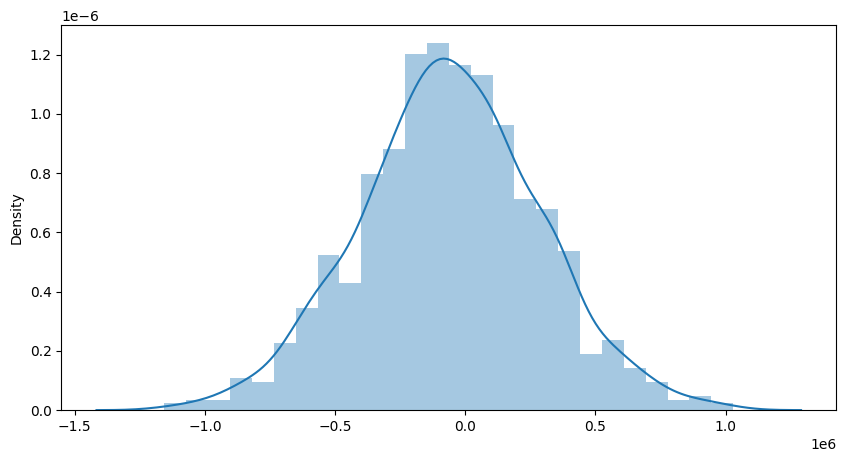

In [ ]:
# Distribution plot for Residual (difference between actual and predicted values)
sns.distplot(residual, kde=True)

It represents that our mode is not skewed as the distribution is center aligned but note the values of the X and Y axis they in power of 6. Which means the difference between actual and predicted value is high

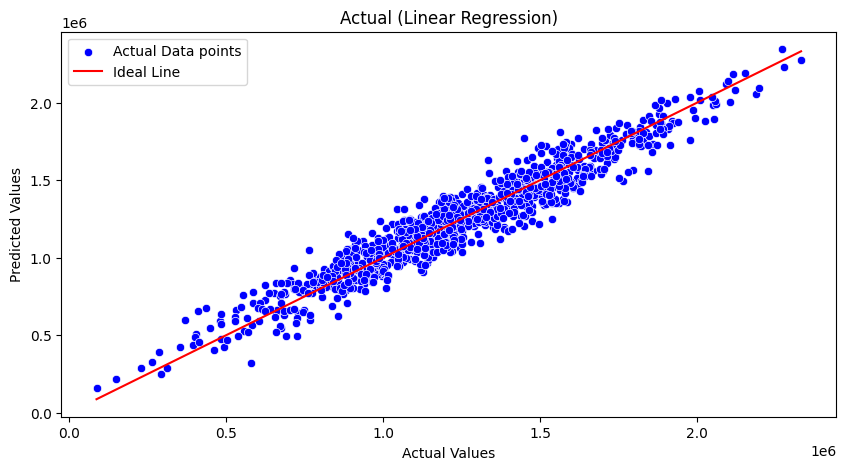

In [ ]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual (Linear Regression)')
plt.legend()
plt.show()

## **Model Evaluation**

In [ ]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 10100187858.864885
Root Mean Squared Error: 100499.69083964829


### **Interpretation**  
**Accuracy**  
MSE is very high
Here are some Questions for you

1. what are the possible reasons for higher MSE Values
2. what can we do to lower the value of MSE.